In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_1 = pd.read_csv(r'C:\Users\Esteban\Desktop\UTN\UTN 2025\Cienca de datos\TP1_CD\str_1.csv', delimiter=';')
df_2 = pd.read_csv(r'C:\Users\Esteban\Desktop\UTN\UTN 2025\Cienca de datos\TP1_CD\str_2.csv', delimiter=';')

df = pd.concat([df_1, df_2], ignore_index=True)

Exploración inicial del dataset

In [23]:
# Mostrar las primeras filas de los datos combinados
df.head()

,ID,protocol,browser_type,login_attempts,duration,packet_size,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack
0,0,TCP,Edge,4.0,492.983263,599,DES,0.606818,1,0,Y
1,1,TCP,Firefox,3.0,1557.996461,472,DES,0.301569,0,0,N
2,2,TCP,Chrome,3.0,75.044262,629,DES,0.739164,2,0,Y
3,3,UDP,Unknown,4.0,601.248835,804,DES,0.123267,0,0,Y
4,4,TCP,Firefox,5.0,532.540888,453,AES,0.054874,1,0,N


In [19]:
print('Tipos de datos y nulos')
print(df.info())

Tipos de datos y nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9537 non-null   int64  
 1   protocol             9537 non-null   object 
 2   browser_type         9537 non-null   object 
 3   login_attempts       9409 non-null   float64
 4   duration             9537 non-null   float64
 5   packet_size          9537 non-null   int64  
 6   encryption_used      9537 non-null   object 
 7   ip_reputation_score  9537 non-null   float64
 8   failed_logins        9537 non-null   int64  
 9   unusual_time_access  9537 non-null   int64  
 10  attack               9537 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 819.7+ KB
None


In [20]:
print('Medidas estadísticas')
print(df.describe())

Medidas estadísticas
                ID  login_attempts     duration  packet_size  \
count  9537.000000     9409.000000  9537.000000  9537.000000   
mean   3124.823949        4.029971   792.745312   500.430639   
std    2209.075559        1.962595   786.560144   198.379364   
min       0.000000        1.000000     0.500000    64.000000   
25%    1192.000000        3.000000   231.953006   365.000000   
50%    2658.000000        4.000000   556.277457   499.000000   
75%    5042.000000        5.000000  1105.380602   635.000000   
max    7426.000000       13.000000  7190.392213  1285.000000   

       ip_reputation_score  failed_logins  unusual_time_access  
count          9537.000000    9537.000000          9537.000000  
mean              0.331338       1.517773             0.149942  
std               0.177175       1.033988             0.357034  
min               0.002497       0.000000             0.000000  
25%               0.191946       1.000000             0.000000  
50%         

In [ ]:
print('Conteo de valores nulos')
print(df.isnull().sum())

Visualización gráfica de las variables
- Protocolo de comunicación
- Navegador utilizado
- Intentos de login
- Duración de la conexión (Segundos)
- Protocolo de encriptación
- Confiabilidad del IP (de 0 a 1)
- Intentos fallidos de login
- Horario inusual (0 o 1)
- Detección de ataque (0 o 1)

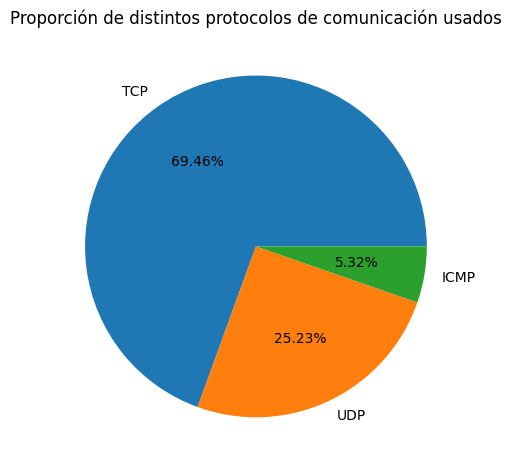

In [3]:
# Protocolo de comunicación
plt.pie(df.protocol.value_counts(), labels=df.protocol.unique(), autopct='%1.2f%%') #
plt.title('Proporción de distintos protocolos de comunicación usados')

plt.tight_layout()
plt.show()

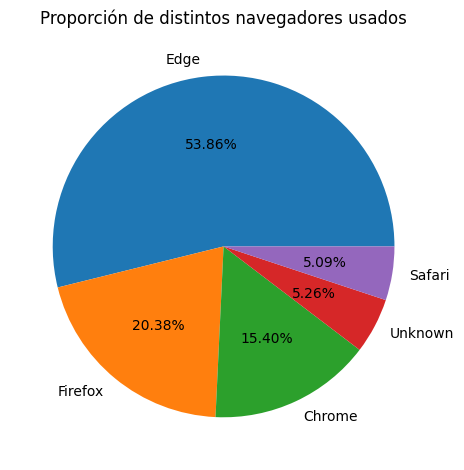

In [4]:
# Navegador
plt.pie(df.browser_type.value_counts(), labels=df.browser_type.unique(), autopct='%1.2f%%') #
plt.title('Proporción de distintos navegadores usados')

plt.tight_layout()
plt.show()

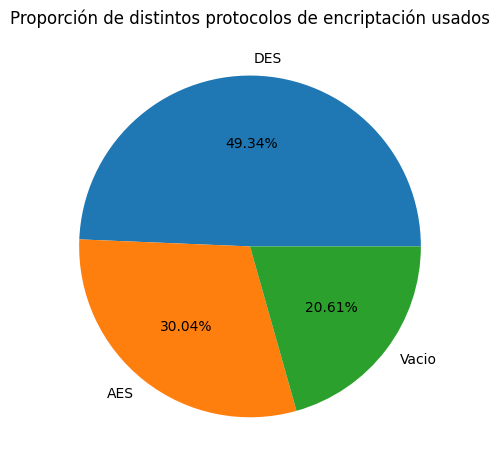

In [8]:
# Protocolo de encriptación
df_encryption_used = df['encryption_used'][:]
df_encryption_used.fillna('Vacio', inplace=True)

plt.pie(df_encryption_used.value_counts(), labels=df_encryption_used.unique(), autopct='%1.2f%%') #
plt.title('Proporción de distintos protocolos de encriptación usados')

plt.tight_layout()
plt.show()

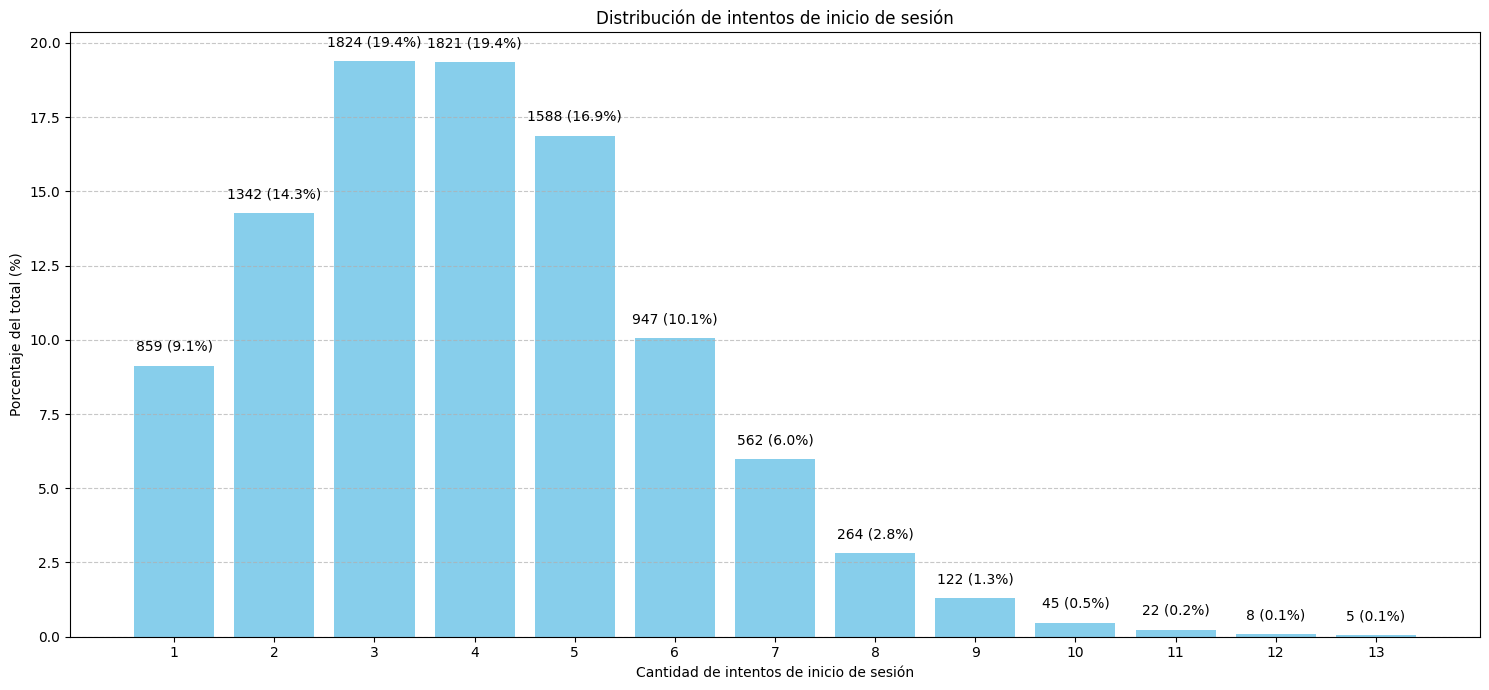

In [18]:
# Intentos de login

# Contar los intentos de inicio de sesión
login_counts_total = df['login_attempts'].value_counts()  # Cantidad total de intentos
login_counts_percent = (login_counts_total / login_counts_total.sum()) * 100  # Convertir a porcentaje

# Crear el gráfico de barras
plt.figure(figsize=(15, 7))
plt.bar(login_counts_total.index, login_counts_percent, color='skyblue')

# Etiquetas y título
plt.xlabel('Cantidad de intentos de inicio de sesión')
plt.ylabel('Porcentaje del total (%)')
plt.title('Distribución de intentos de inicio de sesión')

# Mostrar los valores sobre las barras (total y porcentaje)
for i, v in enumerate(login_counts_total.index):
    total = login_counts_total[v]
    percent = login_counts_percent[v]
    plt.text(v, percent + 0.5, f"{total} ({percent:.1f}%)", ha='center', fontsize=10)

# Configurar el eje X para que vaya de 1 en 1
plt.xticks(range(int(min(login_counts_total.index)), int(max(login_counts_total.index)) + 1, 1))

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de guía en el eje Y

# Mostrar el gráfico
plt.tight_layout()
plt.show() 

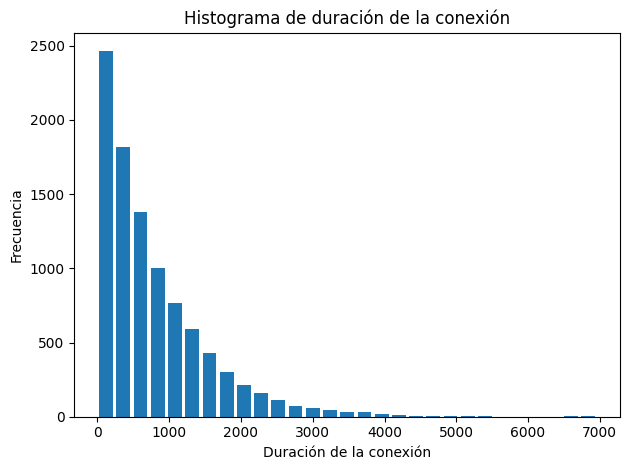

In [11]:
# Duración de la conexión

duracion=df.duration[:]

minimo_duracion=min(duracion)
maximo_duracion=max(duracion)

cantidad_datos_duration=len(duracion)
cantidad_intervalos_duration = round((maximo_duracion-minimo_duracion)/30)

intervalos_duration=[ punto for punto in range(int(minimo_duracion), int(maximo_duracion), int(cantidad_intervalos_duration) ) ]

plt.hist(duracion, intervalos_duration, histtype='bar', rwidth=0.8) #
plt.title('Histograma de duración de la conexión')
plt.ylabel('Frecuencia')
plt.xlabel('Duración de la conexión')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

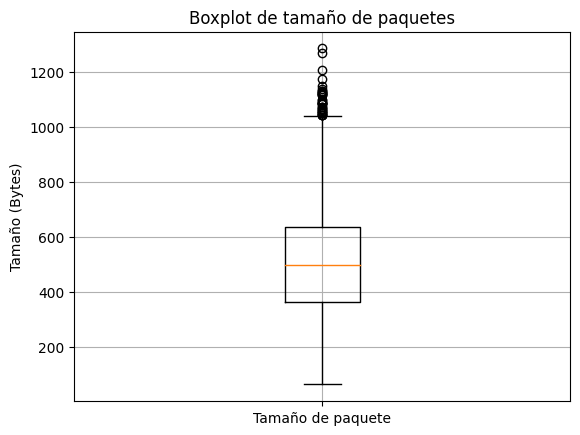

In [12]:
# Tamaño de paquete
data = df['packet_size'][:]

# Crear el boxplot
plt.boxplot(data)
plt.title('Boxplot de tamaño de paquetes')
plt.ylabel('Tamaño (Bytes)')
plt.xticks([1], ['Tamaño de paquete'])  # Etiqueta del eje X
plt.grid(True)
plt.show()

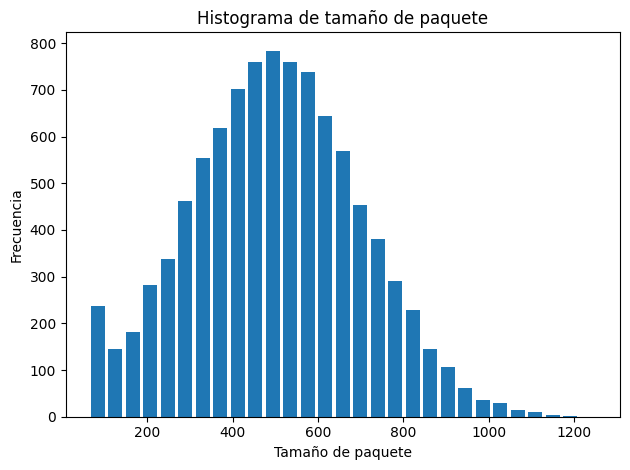

In [13]:
duracion=df.packet_size[:]

minimo_duracion=min(duracion)
maximo_duracion=max(duracion)

cantidad_datos_duration=len(duracion)
cantidad_intervalos_duration = round((maximo_duracion-minimo_duracion)/30)

intervalos_duration=[ punto for punto in range(int(minimo_duracion), int(maximo_duracion), int(cantidad_intervalos_duration) ) ]

plt.hist(duracion, intervalos_duration, histtype='bar', rwidth=0.8) #
plt.title('Histograma de tamaño de paquete')
plt.ylabel('Frecuencia')
plt.xlabel('Tamaño de paquete')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

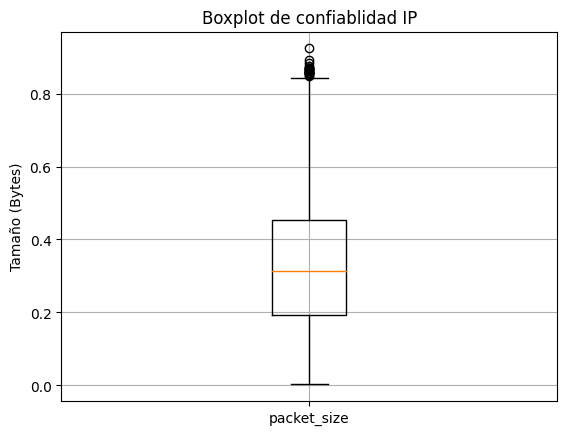

In [ ]:
# Confiabilidad IP
data = df['ip_reputation_score'][:]

# Crear el boxplot
plt.boxplot(data)
plt.title('Boxplot de confiablidad IP')
plt.ylabel('Tamaño (Bytes)')
plt.xticks([1], ['Confiabilidad IP'])  # Etiqueta del eje X
plt.grid(True)
plt.show()

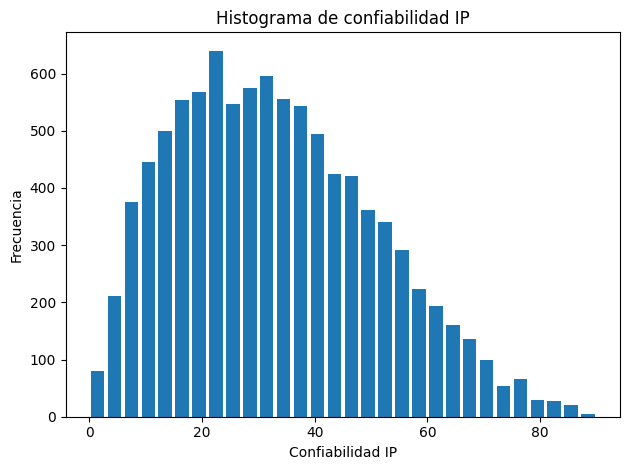

In [15]:
duracion=df.ip_reputation_score[:]*100

minimo_duracion=min(duracion)
maximo_duracion=max(duracion)

cantidad_datos_duration=len(duracion)
cantidad_intervalos_duration = round((maximo_duracion-minimo_duracion)/30)

intervalos_duration=[ punto for punto in range(int(minimo_duracion), int(maximo_duracion), int(cantidad_intervalos_duration) ) ]

plt.hist(duracion, intervalos_duration, histtype='bar', rwidth=0.8) #
plt.title('Histograma de confiabilidad IP')
plt.ylabel('Frecuencia')
plt.xlabel('Confiabilidad IP')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

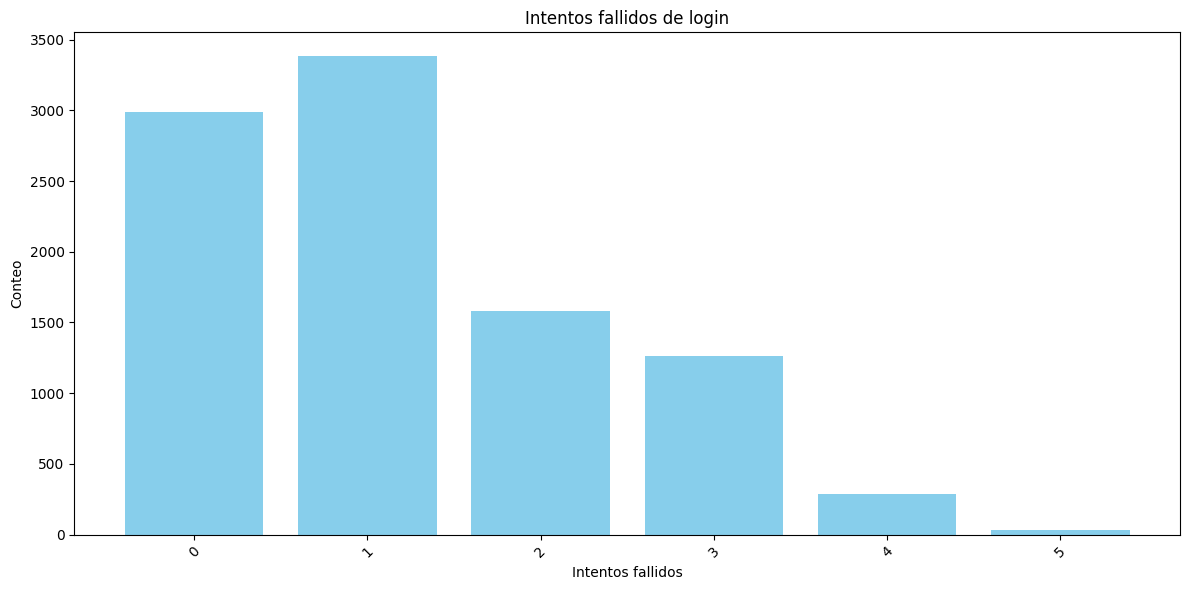

In [ ]:
# Intentos fallidos de login
plt.figure(figsize=(12, 6))
plt.bar(df.failed_logins.unique(), df.failed_logins.value_counts(), color='skyblue')
plt.xticks(rotation = 45)
plt.xlabel('Intentos fallidos')
plt.ylabel('Conteo')
plt.title('Intentos fallidos de login')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

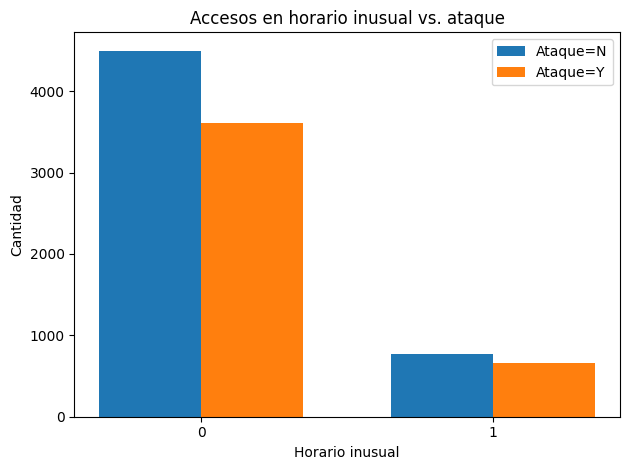

In [17]:
# Horario inusual
cross_tab = pd.crosstab(df['unusual_time_access'], df['attack'])

# Preparar posiciones para las barras
labels = cross_tab.index.astype(str)  # 0 o 1
attack_values = cross_tab.columns  # 0 y 1 (sin ataque / con ataque)
x = np.arange(len(labels))  # posiciones en el eje X
width = 0.35  # ancho de las barras

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots()
for i, col in enumerate(attack_values):
    ax.bar(x + i * width, cross_tab[col], width, label=f'Ataque={col}')

# Etiquetas y leyenda
ax.set_xlabel('Horario inusual')
ax.set_ylabel('Cantidad')
ax.set_title('Accesos en horario inusual vs. ataque')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Matriz de correlación numérica
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

# Mapa de calor
fig, ax = plt.subplots(figsize=(10, 8))

# Mostrar la matriz como imagen
cax = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Agregar etiquetas de los ejes
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(correlation_matrix.columns)

# Mostrar los valores dentro de cada celda
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        value = correlation_matrix.iloc[i, j]
        ax.text(j, i, f'{value:.2f}', ha='center', va='center', color='black')

# Título y colorbar
plt.title("Matriz de correlación")
fig.colorbar(cax)
plt.tight_layout()
plt.show()